<img src="http://hilpisch.com/tpq_logo.png" width=350px align="right">

# Stock Market Prediction

&copy; Dr. Yves J. Hilpisch

The Python Quants GmbH

In [356]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
from pandas_datareader import data as web

## Getting Historical Data

In [357]:
data = pd.DataFrame(web.DataReader('AMZN', data_source='yahoo')['Close'])

In [358]:
data.columns = ['prices']

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2396 entries, 2009-12-31 to 2019-07-10
Data columns (total 1 columns):
prices    2396 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


In [360]:
# !conda install -y pandas-datareader

In [361]:
# !conda install -y pandas=0.19

In [362]:
pd.__version__

'0.23.0'

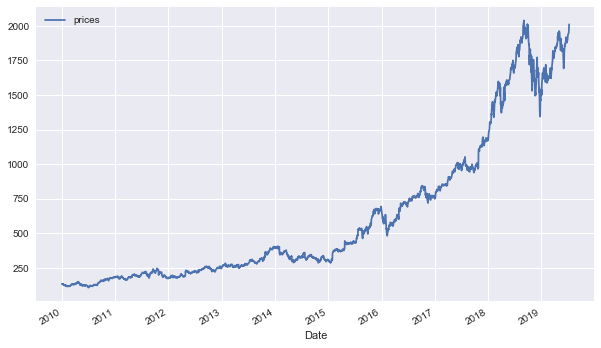

In [363]:
data.plot(figsize=(10, 6));

In [364]:
data['returns'] = np.log(data / data.shift(1))

In [365]:
data.head()

,prices,returns
Date,,
2009-12-31,134.520004,NaN
2010-01-04,133.899994,-0.004620
2010-01-05,134.690002,0.005883
2010-01-06,132.250000,-0.018282
2010-01-07,130.000000,-0.017160


In [366]:
lags = 5

In [367]:
cols = []

In [368]:
for lag in range(1, lags+1):
    col = 'ret_%d' % lag
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [369]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5
Date,,,,,,,
2009-12-31,134.520004,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,133.899994,-0.004620,NaN,NaN,NaN,NaN,NaN
2010-01-05,134.690002,0.005883,-0.004620,NaN,NaN,NaN,NaN
2010-01-06,132.250000,-0.018282,0.005883,-0.004620,NaN,NaN,NaN
2010-01-07,130.000000,-0.017160,-0.018282,0.005883,-0.00462,NaN,NaN


In [370]:
data.dropna(inplace=True)

In [371]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5
Date,,,,,,,
2010-01-11,130.309998,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.004620
2010-01-12,127.349998,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,0.005883
2010-01-13,129.110001,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.018282
2010-01-14,127.349998,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.017160
2010-01-15,127.139999,-0.001650,-0.013726,0.013726,-0.022977,-0.024335,0.026717


In [372]:
def gaussian(xa):
    x = xa.copy()
    mean = x.mean()
    std = x.std()
    return (x - mean) / std, mean, std

In [373]:
## Additional Features
# 1. EWMA
data['ewm20'] = data['prices'].ewm(span=20, adjust=False).mean()
data['ewm20'], mean, std = gaussian(data['ewm20'])
cols.append('ewm20')

In [374]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5,ewm20
Date,,,,,,,,
2010-01-11,130.309998,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.004620,-0.913415
2010-01-12,127.349998,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.913949
2010-01-13,129.110001,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,-0.914114
2010-01-14,127.349998,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.914581
2010-01-15,127.139999,-0.001650,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.915041


In [375]:
# 2. EWStandard Deviation
#data['ewstd20'] = data['prices'].ewm(span=20, adjust=False).std()
#data['ewstd20'], mean, std = gaussian(data['ewstd20'])
#cols.append('ewstd20')

In [376]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5,ewm20
Date,,,,,,,,
2010-01-11,130.309998,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.004620,-0.913415
2010-01-12,127.349998,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.913949
2010-01-13,129.110001,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,-0.914114
2010-01-14,127.349998,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.914581
2010-01-15,127.139999,-0.001650,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.915041


## RSI Feature

In [377]:
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
 #pd.stats.moments.ewma(d, com=period-1, adjust=False)

 rs = u.ewm(span=period-1, adjust=False).mean() / d.ewm(span=period-1, adjust=False).mean()

 return 100 - 100 / (1 + rs)

In [378]:
rsi3 = RSI(data['prices'], 10)

In [379]:
#pd.__version__
#rsi3.unique()

In [380]:
rsi3, mean, std = gaussian(rsi3)

In [381]:
rsi3.dropna(inplace=True)

In [382]:
#data['rsi'] = rsi3
#cols.append('rsi')

In [383]:
data.dropna(inplace=True)

In [384]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5,ewm20
Date,,,,,,,,
2010-01-11,130.309998,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.004620,-0.913415
2010-01-12,127.349998,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,0.005883,-0.913949
2010-01-13,129.110001,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.018282,-0.914114
2010-01-14,127.349998,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.017160,-0.914581
2010-01-15,127.139999,-0.001650,-0.013726,0.013726,-0.022977,-0.024335,0.026717,-0.915041


In [385]:
cols

['ret_1', 'ret_2', 'ret_3', 'ret_4', 'ret_5', 'ewm20']

In [386]:
#cols.append('rsi')

## MACD Feature

In [387]:
def MACD(series, period):
 exp1 = series.ewm(span=12, adjust=False).mean()
 exp2 = series.ewm(span=26, adjust=False).mean()
 macd = exp1-exp2

 return macd

In [388]:
rsi3 = RSI(data['prices'], 10)

In [389]:
macd3, mean, std = gaussian(macd3)

In [390]:
macd3.dropna(inplace=True)

In [391]:
data['macd'] = macd3
cols.append('macd')

In [392]:
data.head(1)

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5,ewm20,macd
Date,,,,,,,,,
2010-01-11,130.309998,-0.024335,0.026717,-0.01716,-0.018282,0.005883,-0.00462,-0.913415,-0.334896


In [393]:
cols

['ret_1', 'ret_2', 'ret_3', 'ret_4', 'ret_5', 'ewm20', 'macd']

## Variance Feature

In [430]:
data['v1'] = data['prices'].rolling(5).std()
data['v2'] = data['prices'].rolling(20).std()
cols.append('v1')
cols.append('v2')

#data['ewm20'] = data['prices'].ewm(span=20, adjust=False).std()
#data['ewm20'], mean, std = gaussian(data['ewm20'])


## EWMA for Variance

In [434]:
#pd.ewstd
data['ewmstd'] = data['prices'].ewm(span=20, adjust=False).std()
#data['ewma_v1'] = data['prices'].ewmstd(span=20, adjust=False).std()
#data['ewma_v2'], mean, std = gaussian(data['ewm20'])
#cols.append('ewm20')

#pandas.ewmstd(arg, com=None, span=None, halflife=None, min_periods=0, bias=False, ignore_na=False, adjust=True)

In [440]:
data['ewmstd'], mean, std = gaussian(data['ewmstd'])
cols.append('ewmstd')

In [441]:
data.dropna(inplace=True)

## OLS Regression

In [442]:
reg = np.linalg.lstsq(data[cols].values, np.sign(data['returns'].values))[0]

C:\Users\deepa\Anaconda2\envs\ana5py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [443]:
cols

['ret_1',
 'ret_2',
 'ret_3',
 'ret_4',
 'ret_5',
 'ewm20',
 'macd',
 'v1',
 'v2',
 'ewmstd']

In [444]:
reg

array([-1.09899435e+00, -1.17617845e+00, -7.63751805e-01, -1.64653616e+00,
        3.61984750e-02,  3.33429269e-02,  5.14309980e-02, -4.95872632e-04,
        4.42040201e-03, -8.45884002e-02])

In [445]:
pred = np.sign(np.dot(data[cols].values, reg))

In [446]:
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [447]:
np.sign(data['returns'].values)

array([-1.,  1., -1., ...,  1.,  1.,  1.])

In [448]:
data['ols_pred'] = pred

In [449]:
c = np.sign(data['returns'] * data['ols_pred'])

In [450]:
c.value_counts()

 1.0    1264
-1.0    1101
 0.0       6
dtype: int64

In [451]:
c.value_counts()[1] / (c.value_counts().sum())

0.5331083930830873

In [452]:
data['ols_returns'] = data['returns'] * data['ols_pred']

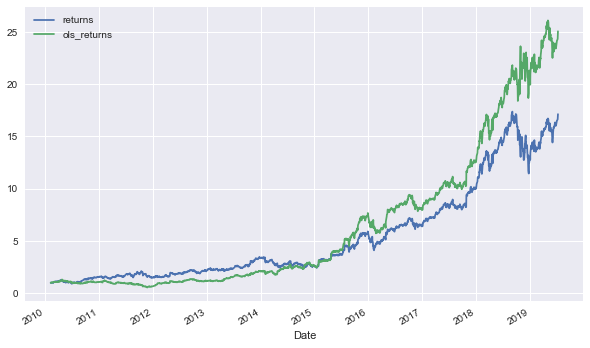

In [453]:
data[['returns', 'ols_returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Logistic Regression

In [454]:
from sklearn import linear_model

In [455]:
lm = linear_model.LogisticRegression(C = 1e6)

In [456]:
lm.fit(data[cols], np.sign(data['returns']))

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [457]:
data['log_pred'] = lm.predict(data[cols])

In [458]:
data.head()

,prices,returns,ret_1,ret_2,ret_3,ret_4,ret_5,ewm20,macd,ols_pred,ols_returns,log_pred,log_returns,dnn_pred,dnn_returns,v1,v2,ewmstd
Date,,,,,,,,,,,,,,,,,,
2010-02-08,116.830002,-0.004782,0.012429,-0.026891,0.008262,-0.006329,-0.053558,-0.928657,-0.538502,1.0,-0.004782,1.0,-0.004782,-1.0,0.004782,1.207902,4.588413,-0.782890
2010-02-09,118.029999,0.010219,-0.004782,0.012429,-0.026891,0.008262,-0.006329,-0.929418,-0.534923,1.0,0.010219,1.0,0.010219,-1.0,-0.010219,1.196522,4.397009,-0.787389
2010-02-10,117.360001,-0.005693,0.010219,-0.004782,0.012429,-0.026891,0.008262,-0.930227,-0.533331,1.0,-0.005693,1.0,-0.005693,1.0,-0.005693,0.780159,4.388361,-0.790542
2010-02-11,120.089996,0.022995,-0.005693,0.010219,-0.004782,0.012429,-0.026891,-0.930467,-0.515594,1.0,0.022995,1.0,-0.022995,1.0,0.022995,1.274910,4.075084,-0.800873
2010-02-12,119.660004,-0.003587,0.022995,-0.005693,0.010219,-0.004782,0.012429,-0.930762,-0.501880,1.0,-0.003587,1.0,-0.003587,-1.0,0.003587,1.425387,3.859284,-0.810213


In [459]:
data['log_returns'] = data['returns'] * data['log_pred']

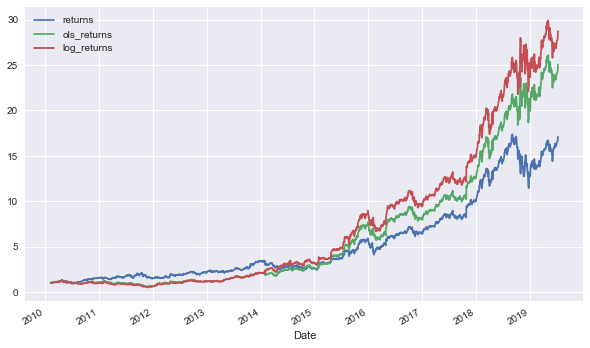

In [460]:
data[['returns', 'ols_returns', 'log_returns']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

## Deep Neural Network

In [461]:
import tensorflow as tf

In [462]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [463]:
mean = data['returns'].mean()

In [464]:
std = data['returns'].std()

In [465]:
print(mean, std)

0.001198157307766946 0.019738324150745484


In [466]:
fc = tf.contrib.layers.real_valued_column('returns', dimension=len(cols))

In [467]:
## DEEPAK - This is the major improvement step
## Adding the below line improves the accuracy by great extent.

# Check at time 12:03 the boundary can be mean-stddev, mean, mean+stddev
# Definitely this can be discussed with different values and 
# Strategy performance can be compared.

#fcb = [tf.contrib.layers.bucketized_column(fc, boundaries=[-0.0005, 0.0001, 0.0005])]
fcb = [tf.contrib.layers.bucketized_column(fc, boundaries=[mean-std, mean, mean+std])]

In [468]:
## DEEPAK - we can tweak the hidden_units
model = tf.contrib.learn.DNNClassifier(hidden_units=[50, 50],
                                       feature_columns=fcb)

In [469]:
cols
len(data)
fc = {'returns': tf.constant(data[cols].values)}
data[cols].values

array([[ 1.24288827e-02, -2.68906266e-02,  8.26238342e-03, ...,
         1.20790198e+00,  4.58841288e+00, -7.82889665e-01],
       [-4.78181729e-03,  1.24288827e-02, -2.68906266e-02, ...,
         1.19652246e+00,  4.39700916e+00, -7.87389383e-01],
       [ 1.02189167e-02, -4.78181729e-03,  1.24288827e-02, ...,
         7.80158795e-01,  4.38836120e+00, -7.90541793e-01],
       ...,
       [ 2.01449053e-03,  2.42167223e-03,  6.28557349e-03, ...,
         1.11089642e+01,  2.88994899e+01,  1.23061852e+00],
       [ 4.83151468e-03,  2.01449053e-03,  2.42167223e-03, ...,
         2.16815613e+01,  3.32413084e+01,  1.41334695e+00],
       [ 1.82616454e-02,  4.83151468e-03,  2.01449053e-03, ...,
         3.14617094e+01,  3.88375923e+01,  1.65631423e+00]])

In [470]:
def get_data():
    fc = {'returns': tf.constant(data[cols].values)}
    # This gives us True or False and then we convert to 1 or 0
    la = tf.constant((data['returns'] > 0).astype(int).values,
                     shape=[len(data), 1])
    return fc, la

In [471]:
model.fit(input_fn=get_data, steps=100)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x00000289A30C0DA0>, 'hidden_units': [50, 50], 'feature_columns': (_BucketizedColumn(source_column=_RealValuedColumn(column_name='returns', dimension=10, default_value=None, dtype=tf.float32, normalizer=None), boundaries=(-0.018540166842978538, 0.001198157307766946, 0.02093648145851243)),), 'optimizer': None, 'activation_fn': <function relu at 0x000002899D9FF400>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [472]:
model.evaluate(input_fn=get_data, steps=1)

{'loss': 0.68541276,
 'accuracy': 0.54829186,
 'labels/prediction_mean': 0.5351034,
 'labels/actual_label_mean': 0.53479546,
 'accuracy/baseline_label_mean': 0.53479546,
 'auc': 0.55854946,
 'auc_precision_recall': 0.58898723,
 'accuracy/threshold_0.500000_mean': 0.54829186,
 'precision/positive_threshold_0.500000_mean': 0.551222,
 'recall/positive_threshold_0.500000_mean': 0.8359621,
 'global_step': 100}

In [473]:
data['dnn_pred'] = list(model.predict(input_fn=get_data))
data['dnn_pred'] = np.where(data['dnn_pred'] > 0, 1.0, -1.0)

In [474]:
data['dnn_returns'] = data['returns'] * data['dnn_pred']

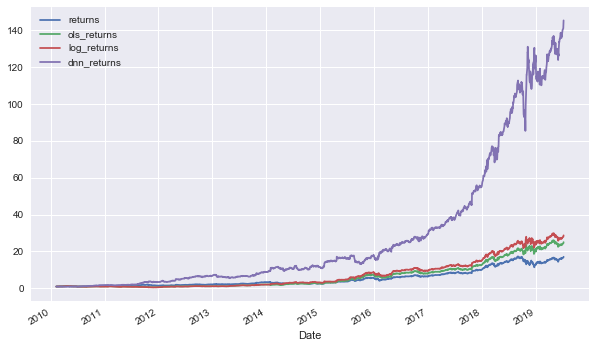

In [475]:
data[['returns', 'ols_returns', 'log_returns', 'dnn_returns']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

<img src="http://hilpisch.com/tpq_logo.png" width=350px align="right">